In [1]:
#%pip install -U pandas scikit-learn matplotlib

In [2]:
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [3]:
data = pd.read_csv("ozone.csv")
data

,Date,MaxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,MaxO3v,Vent,Pluie
0,20010601,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84,Nord,Sec
1,20010602,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87,Nord,Sec
2,20010603,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82,Est,Sec
3,20010604,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92,Nord,Sec
4,20010605,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114,Ouest,Sec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,20010925,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76,Sud,Sec
108,20010927,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71,Sud,Pluie
109,20010928,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77,Sud,Sec
110,20010929,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99,Ouest,Pluie


In [4]:
y = data["MaxO3"]

In [5]:
data=data[["T9","T12","T15","Ne9","Ne12","Ne15","Vx9","Vx12","Vx15","MaxO3v"]]
data

,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,MaxO3v
0,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84
1,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87
2,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82
3,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92
4,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114
...,...,...,...,...,...,...,...,...,...,...
107,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76
108,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71
109,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77
110,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99


In [6]:
data.describe()

,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,MaxO3v
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,18.360714,21.526786,22.627679,4.928571,5.017857,4.830357,-1.214346,-1.611004,-1.690683,90.571429
std,3.122726,4.042321,4.530859,2.594916,2.281860,2.332259,2.632742,2.795673,2.810198,28.276853
min,11.300000,14.000000,14.900000,0.000000,0.000000,0.000000,-7.878500,-7.878500,-9.000000,42.000000
25%,16.200000,18.600000,19.275000,3.000000,4.000000,3.000000,-3.276450,-3.564700,-3.939200,71.000000
50%,17.800000,20.550000,22.050000,6.000000,5.000000,5.000000,-0.866000,-1.879400,-1.549650,82.500000
75%,19.925000,23.550000,25.400000,7.000000,7.000000,7.000000,0.694600,0.000000,0.000000,106.000000
max,27.000000,33.500000,35.500000,8.000000,8.000000,8.000000,5.196200,6.577800,5.000000,166.000000


In [7]:
def normalization(data):
    columns = data.columns
    for col in columns:
        x = data[[col]].values.astype(float)
        standard_normalizer = preprocessing.StandardScaler()
        data[col]=standard_normalizer.fit_transform(x)
        
normalization(data)
#TODO comprendre la normalisation

/var/folders/c9/z15s99997pl5hyx3zkjdxy2h0000gn/T/ipykernel_30363/3676496529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=standard_normalizer.fit_transform(x)
/var/folders/c9/z15s99997pl5hyx3zkjdxy2h0000gn/T/ipykernel_30363/3676496529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col]=standard_normalizer.fit_transform(x)
/var/folders/c9/z15s99997pl5hyx3zkjdxy2h0000gn/T/ipykernel_30363/3676496529.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [8]:
data

,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,MaxO3v
0,-0.888045,-0.752140,-0.937279,-0.359451,-0.448069,1.365152,0.728338,-0.035606,0.356046,-0.233441
1,-0.437704,-0.776989,-1.092469,0.027650,-0.007861,0.934456,-1.188782,-0.858374,-0.468010,-0.126870
2,-0.984547,-0.975785,-0.693408,-1.133653,-0.007861,-0.357631,1.590540,1.254113,0.790522,-0.304488
3,-0.695042,-0.453946,-0.028306,-1.520753,-1.768695,-2.080415,0.839060,0.703625,0.542276,0.050748
4,-0.309035,-0.255151,-0.493878,1.188953,1.312765,0.934456,0.272551,-0.482687,-0.943449,0.832266
...,...,...,...,...,...,...,...,...,...,...
107,-1.627892,-0.950935,-1.070299,-0.746552,-0.007861,0.503760,0.463320,0.219536,0.144795,-0.517629
108,-0.695042,-0.180602,-0.116987,0.414751,-0.007861,0.073064,0.198303,-0.139768,0.115306,-0.695247
109,-0.469871,0.366086,-0.006136,0.414751,-0.448069,0.934456,1.035629,0.890786,0.914663,-0.482105
110,-0.469871,-0.429097,-0.116987,0.414751,-0.007861,-0.788327,-1.062836,-0.771710,-0.825457,0.299413


In [9]:
x_train, x_test, y_train, y_test = train_test_split(data,y,test_size=0.2)

In [10]:
regression_alg = LinearRegression()

In [11]:
regression_alg.fit(x_train, y_train)

LinearRegression()

In [12]:
train_predictions = regression_alg.predict(x_train)
print(f"RMSE = {round(sqrt(mean_squared_error(y_train, train_predictions)),2)}") # l'écart type
print(f"R2_score = {round(r2_score(y_train, train_predictions),2)}") # la variance

RMSE = 13.16
R2_score = 0.78


In [13]:
test_predictions = regression_alg.predict(x_test)
print(f"RMSE = {round(sqrt(mean_squared_error(y_test, test_predictions)),2)}")
print(f"R2_score = {round(r2_score(y_test, test_predictions),2)}")

RMSE = 16.47
R2_score = 0.68


In [14]:
regression_alg.coef_

array([ 1.59650576,  2.34318152,  7.66952415, -8.09618427,  0.434656  ,
        1.67830042,  2.91572587,  0.48287562,  0.58765077,  8.83259565])

In [15]:
regression_alg.intercept_

90.30206750256528

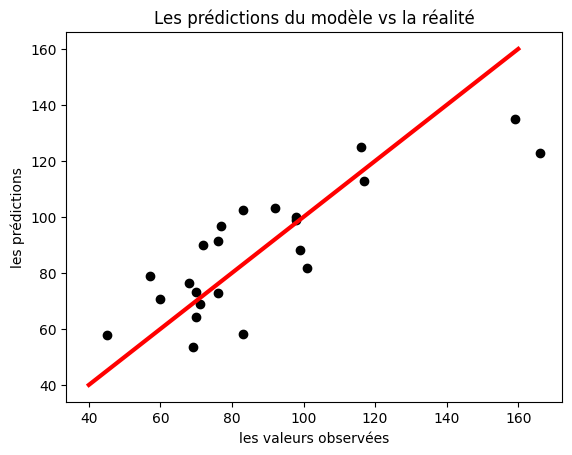

In [16]:
plt.scatter(y_test,test_predictions,color="black")
plt.title("Les prédictions du modèle vs la réalité")
plt.xlabel("les valeurs observées")
plt.ylabel("les prédictions")
plt.plot([40.0, 160.0], [40.0, 160.0], color='red', linewidth=3)

In [24]:
def average_result(nb_run,verbose=False):
    average_rmse = 0
    average_r2 = 0
    for i_run in range(nb_run):
        x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2)
        
        regression_alg = LinearRegression()
        regression_alg.fit(x_train,y_train)
        
        test_predictions = regression_alg.predict(x_test)
        i_run_rmse = sqrt(mean_squared_error(y_test, test_predictions))
        i_run_r2 = r2_score(y_test, test_predictions)
        
        if verbose:print(f"Run {i_run} : RMSE = {round(i_run_rmse,2)} - R2_score = {round(i_run_r2,2)}")
        average_rmse += i_run_rmse
        average_r2 += i_run_r2
    
    average_rmse /= nb_run
    average_r2 /= nb_run
    print(f"Moyenne : RMSE = {round(average_rmse,2)} - R2_score = {round(average_r2,2)}")
        

In [25]:
average_result(10)

Moyenne : RMSE = 16.68 - R2_score = 0.65


In [26]:
average_result(20)

Moyenne : RMSE = 14.86 - R2_score = 0.62


In [27]:
average_result(30)

Moyenne : RMSE = 15.97 - R2_score = 0.64


In [31]:
average_result(50)

Moyenne : RMSE = 15.33 - R2_score = 0.65


In [36]:
average_result(100)

Moyenne : RMSE = 14.93 - R2_score = 0.68


In [37]:
from sklearn.model_selection import KFold

In [38]:
kf = KFold(n_splits=2,shuffle=False)

In [39]:
for train_index, test_index in kf.split(data):
    print(f"Les indices de train_index = {train_index}")
    print(f"Les indices de test_index = {test_index}")
    print("\n\n")

Les indices de train_index = [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111]
Les indices de test_index = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]



Les indices de train_index = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
Les indices de test_index = [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111]





In [41]:
kf = KFold(n_splits=2,shuffle=True)
for train_index, test_index in kf.split(data):
    print(f"Les indices de train_index = {train_index}")
    print(f"Les indices de test_index = {test_index}")
    print("\n\n")

Les indices de train_index = [  2   4   5   7   8   9  10  12  13  17  23  24  26  32  35  36  39  42
  43  44  45  49  52  53  54  55  56  57  59  60  62  65  66  67  68  69
  70  71  73  75  76  77  79  82  83  84  89  92  93  94  95  99 100 101
 109 111]
Les indices de test_index = [  0   1   3   6  11  14  15  16  18  19  20  21  22  25  27  28  29  30
  31  33  34  37  38  40  41  46  47  48  50  51  58  61  63  64  72  74
  78  80  81  85  86  87  88  90  91  96  97  98 102 103 104 105 106 107
 108 110]



Les indices de train_index = [  0   1   3   6  11  14  15  16  18  19  20  21  22  25  27  28  29  30
  31  33  34  37  38  40  41  46  47  48  50  51  58  61  63  64  72  74
  78  80  81  85  86  87  88  90  91  96  97  98 102 103 104 105 106 107
 108 110]
Les indices de test_index = [  2   4   5   7   8   9  10  12  13  17  23  24  26  32  35  36  39  42
  43  44  45  49  52  53  54  55  56  57  59  60  62  65  66  67  68  69
  70  71  73  75  76  77  79  82  83  84  89  92  

In [42]:
kf = KFold(n_splits=3,shuffle=False)
for train_index, test_index in kf.split(data):
    print(f"nombre de train_index {train_index.shape[0]}")
    print(f"nombre de test_index {test_index.shape[0]}")
    print("\n\n")

nombre de train_index 74
nombre de test_index 38



nombre de train_index 75
nombre de test_index 37



nombre de train_index 75
nombre de test_index 37





In [ ]:
def create_evaluate_model(index_fold,x_train,x_test,y_train,y_test):
    regression_alg = LinearRegression()
    regression_alg.fit(x_train,y_train)
    
    